
# AI/ML Project 
## Manny Lazalde, Ivy Chen, Michael Vinciguerra 
### November 2, 2020


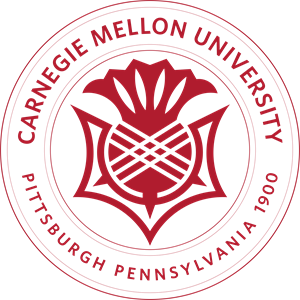

# Import all libraries.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from google.colab import drive
import statistics
import imgaug.augmenters as im_aug
import os
import matplotlib.pylab as plt
from skimage.transform import resize

# Setup the Google drive to import the data.

In [ ]:
# Lets mount the google drive so we can use Drive as file system
from google.colab import drive
drive.mount('/content/drive')
# using ! means bash. able to use command-line like lingo
#!cd 'drive/My Drive/Colab Notebooks/Car'
drive_mounted = True

Mounted at /content/drive


Use the below code to flush the drive.

In [ ]:
# to unmount the drive and save any appropriate changes
if drive_mounted:
  drive.flush_and_unmount()
  print('All changes made in this colab session should now be visible in Drive.')

# Import the data.
The data has already been saved into the Google drive in the Deep network ipynb.

In [ ]:
#for loading the data
path_var = 'drive/My Drive/AI_ML Project/Shoulder Implants/' 
images = np.load(path_var + 'images_unstandardized.npy')
labels = np.load(path_var + 'labels.npy')
image_names = np.load(path_var + 'image_names.npy')

In [ ]:
# Prepare the data for use in each method
kf = StratifiedKFold(n_splits = 10)
n_images, pixels_x, pixels_y, rgb = images.shape
x = images.reshape((n_images, pixels_x*pixels_y*rgb))

# Shallow Models

## Random Forest Classifier

In [ ]:
accs = []
precisions = []
recalls = []
f1_scores = []

for train_index, valid_index in kf.split(x, labels):
  x_train_split, x_valid_split = x[train_index], x[valid_index]
  y_train_split, y_valid_split = labels[train_index], labels[valid_index]

  # Hyperparameters - 500 trees, Entropy split criterion
  rfc = RandomForestClassifier(n_estimators=500, criterion='entropy')

  rfc.fit(x_train_split, y_train_split)

  pred = rfc.predict(x_valid_split)

  # Calculate the accuracy
  num_correct = 0
  for i in range(len(pred)):
    if pred[i] == y_valid_split[i]:
      num_correct = num_correct + 1
    
  accs.append(num_correct/len(pred))

  # Calculate the precision, recall and F-1 Score for each class
  precision, recall, f1_score, support = precision_recall_fscore_support(y_valid_split, pred, average='macro')
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1_score)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Relay the results
final_accuracy = sum(accs)/len(accs)
final_accuracy_std = statistics.stdev(accs)
final_precision = sum(precisions)/len(precisions)
final_precision_std = statistics.stdev(precisions)
final_recall = sum(recalls)/len(recalls)
final_recall_std = statistics.stdev(recalls)
final_f1 = sum(f1_scores)/len(f1_scores)
final_f1_std = statistics.stdev(f1_scores)

print('Accuracy: %.2f +- %.2f' % (final_accuracy, final_accuracy_std))
print('Precision: %.2f +- %.2f' % (final_precision, final_precision_std))
print('Recall: %.2f +- %.2f' % (final_recall, final_recall_std))
print('F1-Score: %.2f +- %.2f' % (final_f1, final_f1_std))

Accuracy: 0.55 +- 0.04
Precision: 0.41 +- 0.08
Recall: 0.37 +- 0.04
F1-Score: 0.36 +- 0.06


## Logistic Regression

In [ ]:
accs = []
precisions = []
recalls = []
f1_scores = []

for train_index, valid_index in kf.split(x, labels):
  x_train_split, x_valid_split = x[train_index], x[valid_index]
  y_train_split, y_valid_split = labels[train_index], labels[valid_index]

  # Hyperparameters - L2 Regularization, Stochastic Average Gradient Ascent
  logreg = LogisticRegression(penalty='l2', solver='saga')

  logreg.fit(x_train_split, y_train_split)

  pred = logreg.predict(x_valid_split)

  # Calculate the accuracy
  num_correct = 0
  for i in range(len(pred)):
    if pred[i] == y_valid_split[i]:
      num_correct = num_correct + 1
    
  accs.append(num_correct/len(pred))

  # Calculate the precision, recall and F-1 Score for each class
  precision, recall, f1_score, support = precision_recall_fscore_support(y_valid_split, pred, average='macro')
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1_score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_s

In [ ]:
# Relay the results
final_accuracy = sum(accs)/len(accs)
final_accuracy_std = statistics.stdev(accs)
final_precision = sum(precisions)/len(precisions)
final_precision_std = statistics.stdev(precisions)
final_recall = sum(recalls)/len(recalls)
final_recall_std = statistics.stdev(recalls)
final_f1 = sum(f1_scores)/len(f1_scores)
final_f1_std = statistics.stdev(f1_scores)

print('Accuracy: %.2f +- %.2f' % (final_accuracy, final_accuracy_std))
print('Precision: %.2f +- %.2f' % (final_precision, final_precision_std))
print('Recall: %.2f +- %.2f' % (final_recall, final_recall_std))
print('F1-Score: %.2f +- %.2f' % (final_f1, final_f1_std))

Accuracy: 0.47 +- 0.05
Precision: 0.36 +- 0.11
Recall: 0.34 +- 0.07
F1-Score: 0.34 +- 0.08


## K-Nearest Neighbors

In [ ]:
accs = []
precisions = []
recalls = []
f1_scores = []

for train_index, valid_index in kf.split(x, labels):
  x_train_split, x_valid_split = x[train_index], x[valid_index]
  y_train_split, y_valid_split = labels[train_index], labels[valid_index]

  # Hyperparameters - Euclidean Distance metric, k = 35
  knn = KNeighborsClassifier(n_neighbors=35, p=2, metric='minkowski')

  knn.fit(x_train_split, y_train_split)

  pred = knn.predict(x_valid_split)

  # Calculate the accuracy
  num_correct = 0
  for i in range(len(pred)):
    if pred[i] == y_valid_split[i]:
      num_correct = num_correct + 1
    
  accs.append(num_correct/len(pred))

  # Calculate the precision, recall and F-1 Score for each class
  precision, recall, f1_score, support = precision_recall_fscore_support(y_valid_split, pred, average='macro')
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1_score)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Relay the results
final_accuracy = sum(accs)/len(accs)
final_accuracy_std = statistics.stdev(accs)
final_precision = sum(precisions)/len(precisions)
final_precision_std = statistics.stdev(precisions)
final_recall = sum(recalls)/len(recalls)
final_recall_std = statistics.stdev(recalls)
final_f1 = sum(f1_scores)/len(f1_scores)
final_f1_std = statistics.stdev(f1_scores)

print('Accuracy: %.2f +- %.2f' % (final_accuracy, final_accuracy_std))
print('Precision: %.2f +- %.2f' % (final_precision, final_precision_std))
print('Recall: %.2f +- %.2f' % (final_recall, final_recall_std))
print('F1-Score: %.2f +- %.2f' % (final_f1, final_f1_std))

Accuracy: 0.51 +- 0.03
Precision: 0.34 +- 0.13
Recall: 0.29 +- 0.03
F1-Score: 0.25 +- 0.04


In [ ]:
path_var = 'drive/My Drive/AI_ML Project/Shoulder Implants/' 
np.save(path_var + 'images_augmented', images)
np.save(path_var + 'labels_augmented',labels)

# Augmented Images Training
After running one method, you will have to restart the runtime and reload the augmented data set in order to ensure that Google Colab can have enough RAM at runtime.

In [ ]:
# Set the right path to the data
path_var = 'drive/My Drive/AI_ML Project/Shoulder Implants/data/'
#count the number of images in the folder
path, dirs, files = next(os.walk(path_var))
number_images = len(files)

# lets try to load in our data 
images = np.ndarray(shape = (number_images*9, 250,250,3), dtype = np.float32)
labels = np.ndarray(shape = (number_images*9))
# lets store the names of the images as well 
image_names = []

# Image Augmentation
# Apply a rotation on each image. A random value between the range given in the 
# tuple is used on each image to create the rotation
rotate = im_aug.Affine(rotate=(-45, 45))
# Apply a translation on each image. A random value between the range given in 
# the tuple is used on each image to create the translation. The value is 
# applied to both the x and y-axis equally. The random value represents a 
# percentage of how much to move the image
translate = im_aug.Affine(translate_percent=(-0.25,0.25))
# Apply a shear on each image to distort it. A random value between the range 
# given in the tuple is used on each image to create the effect. Value is in 
# degrees.
shear = im_aug.Affine(shear=(-45,45))
# Apply a scaling on each image to enlarge the features. A random value between
# the range given in the tuple is used on each image to create the effect. A
# value of 0.5, as an example, would shrink the image to be 50% of its original
# size after zooming out.
scaling = im_aug.Affine(scale=(1.05,2)) 
# Apply a cropping to each image. The cropping will be applied to all sides of
# the image equally. A random value between the range given in the tuple is used
# on each image to create the effect.
cropping = im_aug.size.Crop(percent=(0.10, 0.20))
# Flip the image horizontally. Set the probability value p to 1 in order to make
# sure that all images are flipped.
flip_hor = im_aug.Fliplr(p=1.0)
# Flip the image vertically. Set the probability value p to 1 in order to make
# sure that all images are flipped.
flip_vert = im_aug.Flipud(p=1.0)
# Apply noise to the image. A random value between the range given in the tuple
# is used to apply the effect. Was not used in the end but is preserved here
# for future work
#noise = im_aug.AdditiveGaussianNoise(10,30)
# Change the brighntess of the  image. A random value between the range given in
# the tuple is used to apply the effect.
contrast = im_aug.GammaContrast(gamma=(0.5,2.0))

images_augmented = []

i = 0;
# Loop through all files in folder, grabbing labels and images
for file in os.listdir(path_var):
  label = 0
  if file.split('.')[0] == 'Zimmer':
    label = 0
  elif file.split('.')[0] == 'Tornier':
    label = 1
  elif file.split('.')[0] == 'Depuy':
    label = 2
  elif file.split('.')[0] == 'Cofield':
    label = 3
  #read in the image
  pic = plt.imread(path_var + file,format='jpeg')
  #resize the image to the standard dimension
  pic = resize(pic,(250,250,3))

  images[i] = pic
  labels[i] = label
  image_names.append(file)
  i += 1

  # Now apply each transformation one at a time
  rotate_im = rotate.augment_image(pic)
  images[i] = rotate_im
  labels[i] = label
  i += 1

  translate_im = translate.augment_image(pic)
  images[i] = translate_im
  labels[i] = label
  i += 1

  shear_im = shear.augment_image(pic)
  images[i] = shear_im
  labels[i] = label
  i += 1

  scaling_im = scaling.augment_image(pic)
  images[i] = scaling_im
  labels[i] = label
  i += 1

  cropping_im = cropping.augment_image(pic)
  images[i] = cropping_im
  labels[i] = label
  i += 1

  flip_hor_im = flip_hor.augment_image(pic)
  images[i] = flip_hor_im
  labels[i] = label
  i += 1

  flip_vert_im = flip_vert.augment_image(pic)
  images[i] = flip_vert_im
  labels[i] = label
  i += 1

  #noise_im = noise.augment_image(pic)
  #images[i] = noise_im
  #labels[i] = label
  #i += 1

  contrast_im = contrast.augment_image(pic)
  images[i] = contrast_im
  labels[i] = label
  i += 1

# Data is saved afterwards - the code is not shown as it is not necessary for
# understanding the work done here. The code can be found in the archived
# section.

In [ ]:
# Load the data, but make sure to restart the workspace before loading the data
# in order to ensure that there will be enough RAM for each part.
path_var = 'drive/My Drive/AI_ML Project/Shoulder Implants/' 
im_augment = np.load(path_var + 'images_augmented_subset_2.npy')
labels_augment = np.load(path_var + 'labels_augmented_subset_2.npy')

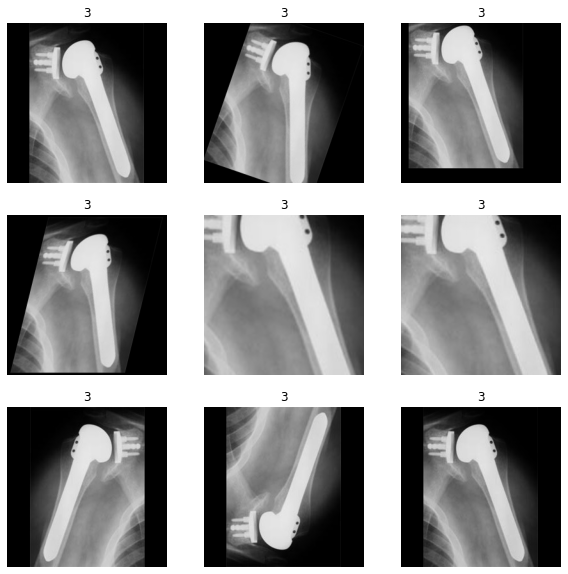

In [ ]:
# Check to make sure that the transformations worked
plt.figure(figsize=(10, 10))
for i in range(9,18):
  ax = plt.subplot(3, 3, i%9 + 1)
  plt.imshow(im_augment[i])
  plt.title(int(labels_augment[i]))
  plt.axis("off")

In [ ]:
# Prepare the data for use in each method
kf = StratifiedKFold(n_splits = 10)
n_images, pixels_x, pixels_y, rgb = im_augment.shape
x = im_augment.reshape((n_images, pixels_x*pixels_y*rgb))
im_augment = 0

## K Nearest Neighbors Classifier

In [ ]:
accs = []
precisions = []
recalls = []
f1_scores = []
aucs = []
j = 1

for train_index, valid_index in kf.split(data, labels_augment):
  x_train_split, x_valid_split = data[train_index], data[valid_index]
  y_train_split, y_valid_split = label_final[train_index], label_final[valid_index]

  # Hyperparameters - Euclidean Distance metric, k = 35
  knn = KNeighborsClassifier(n_neighbors=35, p=2, metric='minkowski')

  knn.fit(x_train_split, y_train_split)

  pred = knn.predict(x_valid_split)

  # Calculate the accuracy
  num_correct = 0
  for i in range(len(pred)):
    if pred[i] == y_valid_split[i]:
      num_correct = num_correct + 1
    
  accs.append(num_correct/len(pred))

  # Calculate the precision, recall and F-1 Score for each class
  precision, recall, f1_score, support = precision_recall_fscore_support(y_valid_split, pred, average='macro')
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1_score)
  print('Done with fold %d' % j)
  j = j + 1

Done with fold 1
Done with fold 2
Done with fold 3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done with fold 4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done with fold 5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done with fold 6


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done with fold 7
Done with fold 8


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done with fold 9
Done with fold 10


In [ ]:
# Relay the results
final_accuracy = sum(accs)/len(accs)
final_accuracy_std = statistics.stdev(accs)
final_precision = sum(precisions)/len(precisions)
final_precision_std = statistics.stdev(precisions)
final_recall = sum(recalls)/len(recalls)
final_recall_std = statistics.stdev(recalls)
final_f1 = sum(f1_scores)/len(f1_scores)
final_f1_std = statistics.stdev(f1_scores)

print('Accuracy: %.2f +- %.2f' % (final_accuracy, final_accuracy_std))
print('Precision: %.2f +- %.2f' % (final_precision, final_precision_std))
print('Recall: %.2f +- %.2f' % (final_recall, final_recall_std))
print('F1-Score: %.2f +- %.2f' % (final_f1, final_f1_std))

Accuracy: 0.50 +- 0.02
Precision: 0.41 +- 0.12
Recall: 0.28 +- 0.02
F1-Score: 0.24 +- 0.02


## Logistic Regression Classifier

In [ ]:
accs = []
precisions = []
recalls = []
f1_scores = []
aucs = []
j = 1

for train_index, valid_index in kf.split(x, labels_augment):
  x_train_split, x_valid_split = x[train_index], x[valid_index]
  y_train_split, y_valid_split = labels_augment[train_index], labels_augment[valid_index]

  # Hyperparameters - L2 Regularization, Stochastic Average Gradient Ascent
  logreg = LogisticRegression(penalty='l2', solver='saga')

  logreg.fit(x_train_split, y_train_split)

  pred = logreg.predict(x_valid_split)

  # Calculate the accuracy
  num_correct = 0
  for i in range(len(pred)):
    if pred[i] == y_valid_split[i]:
      num_correct = num_correct + 1
    
  accs.append(num_correct/len(pred))

  # Calculate the precision, recall and F-1 Score for each class
  precision, recall, f1_score, support = precision_recall_fscore_support(y_valid_split, pred, average='macro')
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1_score)
  print('Done with fold %d' % j)
  j = j + 1

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with fold 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with fold 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with fold 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with fold 4


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with fold 5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with fold 6


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with fold 7


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with fold 8


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with fold 9


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with fold 10


In [ ]:
# Relay the results
final_accuracy = sum(accs)/len(accs)
final_accuracy_std = statistics.stdev(accs)
final_precision = sum(precisions)/len(precisions)
final_precision_std = statistics.stdev(precisions)
final_recall = sum(recalls)/len(recalls)
final_recall_std = statistics.stdev(recalls)
final_f1 = sum(f1_scores)/len(f1_scores)
final_f1_std = statistics.stdev(f1_scores)

print('Accuracy: %.2f +- %.2f' % (final_accuracy, final_accuracy_std))
print('Precision: %.2f +- %.2f' % (final_precision, final_precision_std))
print('Recall: %.2f +- %.2f' % (final_recall, final_recall_std))
print('F1-Score: %.2f +- %.2f' % (final_f1, final_f1_std))

Accuracy: 0.42 +- 0.04
Precision: 0.29 +- 0.05
Recall: 0.28 +- 0.04
F1-Score: 0.28 +- 0.04


## Random Forest Classifier

In [ ]:
accs = []
precisions = []
recalls = []
f1_scores = []
aucs = []
j = 1

for train_index, valid_index in kf.split(data, label_final):
  x_train_split, x_valid_split = data[train_index], data[valid_index]
  y_train_split, y_valid_split = label_final[train_index], label_final[valid_index]

  # Hyperparameters - 500 trees, Entropy split criterion
  rfc = RandomForestClassifier(n_estimators=500, criterion='entropy')

  rfc.fit(x_train_split, y_train_split)

  pred = rfc.predict(x_valid_split)

  # Calculate the accuracy
  num_correct = 0
  for i in range(len(pred)):
    if pred[i] == y_valid_split[i]:
      num_correct = num_correct + 1
    
  accs.append(num_correct/len(pred))

  # Calculate the precision, recall and F-1 Score for each class
  precision, recall, f1_score, support = precision_recall_fscore_support(y_valid_split, pred, average='macro')
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1_score)
  print('Done with fold %d' % j)
  j = j + 1

Done with fold 1
Done with fold 2
Done with fold 3
Done with fold 4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done with fold 5
Done with fold 6


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done with fold 7
Done with fold 8
Done with fold 9
Done with fold 10


In [ ]:
# Relay the results
final_accuracy = sum(accs)/len(accs)
final_accuracy_std = statistics.stdev(accs)
final_precision = sum(precisions)/len(precisions)
final_precision_std = statistics.stdev(precisions)
final_recall = sum(recalls)/len(recalls)
final_recall_std = statistics.stdev(recalls)
final_f1 = sum(f1_scores)/len(f1_scores)
final_f1_std = statistics.stdev(f1_scores)

print('Accuracy: %.2f +- %.2f' % (final_accuracy, final_accuracy_std))
print('Precision: %.2f +- %.2f' % (final_precision, final_precision_std))
print('Recall: %.2f +- %.2f' % (final_recall, final_recall_std))
print('F1-Score: %.2f +- %.2f' % (final_f1, final_f1_std))

Accuracy: 0.52 +- 0.03
Precision: 0.42 +- 0.06
Recall: 0.35 +- 0.04
F1-Score: 0.33 +- 0.05


# Archived Code
Code in this section is not relevant to understanding the project. This code was mostly used to make subsets of the data for use in other snippets of code.

In [ ]:
# Take a subset of the data for getting results
data = np.zeros((int(n_images/9*4), pixels_x, pixels_y, rgb))
label_final = np.zeros(int(n_images/9*4))
j = 0
for i in range(0, len(labels_augment), 9):
  data[j] = im_augment[i]
  label_final[j] = labels_augment[i]
  j = j + 1
  data[j] = im_augment[i+1]
  label_final[j] = labels_augment[i+1]
  j = j + 1
  data[j] = im_augment[i+2]
  label_final[j] = labels_augment[i+2]
  j = j + 1
  data[j] = im_augment[i+3]
  label_final[j] = labels_augment[i+3]
  j = j + 1
  """data[j] = im_augment[i+6]
  label_final[j] = labels_augment[i+6]
  j = j + 1
  data[j] = im_augment[i+7]
  label_final[j] = labels_augment[i+7]
  j = j + 1"""

path_var = 'drive/My Drive/AI_ML Project/Shoulder Implants/' 
np.save(path_var + 'images_augmented_subset_2', data)
np.save(path_var + 'labels_augmented_subset_2',label_final)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


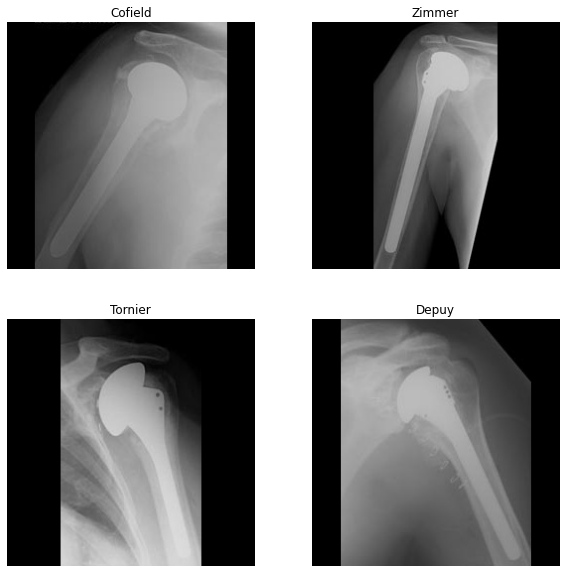

In [10]:
# Used to create a display showing the differences between each of the 
# manufacturers implants
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from google.colab import drive
import statistics
import imgaug.augmenters as im_aug
import os
import matplotlib.pylab as plt
from skimage.transform import resize

# Lets mount the google drive so we can use Drive as file system
from google.colab import drive
drive.mount('/content/drive')
# using ! means bash. able to use command-line like lingo
#!cd 'drive/My Drive/Colab Notebooks/Car'
drive_mounted = True

#for loading the data
path_var = 'drive/My Drive/AI_ML Project/Shoulder Implants/' 
images = np.load(path_var + 'images_unstandardized.npy')
labels = np.load(path_var + 'labels.npy')
image_names = np.load(path_var + 'image_names.npy')

# Check to make sure that the transformations worked
plt.figure(figsize=(10, 10))
num_images = 1
displayed = [False,False,False,False]
for i in range(10, len(labels)):
  if (displayed[int(labels[i])] == False) and num_images < 5:
    ax = plt.subplot(2, 2, num_images)
    plt.imshow(images[i])
    plt.title((image_names[i].split('.'))[0])
    plt.axis("off")
    num_images += 1
    displayed[int(labels[i])] = True